In [41]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from Essential_Functions import Spacing,CalculateSpacing,ConnectDatabase,GetRandomPlayerID,PickleLoad,PickleDump,NormaliseList

In [42]:
# Load the comparison results of both approaches
RS_ComparisonResults = PickleLoad("RS_ComparisonResults")
MF_ComparisonResults = PickleLoad("MF_ComparisonResults")

# Define variable names for specific values to make code easier to read
RS_PlayerAccuracies = RS_ComparisonResults[0]
RS_TankRatings = NormaliseList(RS_ComparisonResults[1])
MF_PlayerAccuracies = MF_ComparisonResults[0]
MF_TankRatings = NormaliseList(MF_ComparisonResults[1])

In [43]:
# Function to create a dataframe from a given list of RS and MF values
def CreateDataframe(RS_List, MF_List, Labels):
    Combined_List = []
    # Loop through the positions of the RS values
    for Position in range(len(RS_List)):
        # Create a row which consists of one RS and one MF value
        Combined_List.append([RS_List[Position], MF_List[Position]])
    # Create the dataframe
    Dataframe = pd.DataFrame(Combined_List, columns = [Labels[0], Labels[1]])
    return Dataframe

In [44]:
# Plot the results of approach comparison onto a heatmap
def PlotComparisonResults(Results, Title, Y_Label):
    plt.figure(figsize = (6,6))
    plt.title(Title, color = "darkblue", size = 18)
    sns.set_context("talk")
    Heatmap = sns.heatmap(Results, yticklabels = False, cmap = "coolwarm")
    Heatmap.set_ylabel(Y_Label)
    Figure = Heatmap.get_figure()
    # Save the heatmap as a png image
    #Figure.savefig("Visualisations/" + Title + ".png", dpi=100)

In [45]:
# Function to plot the tuning results of the MF model
def PlotTuningResults(Results,Title,AxisTitles,AxisLimits):
    plt.figure(figsize = (8,6))
    plt.plot(Results[0], Results[1], color = "darkorange", linewidth = 2, marker = ".", markersize = 12)
    plt.grid()
    plt.xlim(AxisLimits[0][0], AxisLimits[0][1])
    plt.ylim(AxisLimits[1][0], AxisLimits[1][1])

    plt.title(Title, color = "darkblue", size = 20)
    plt.xlabel(AxisTitles[0], color = "darkblue", size = 15)
    plt.ylabel(AxisTitles[1], color = "darkblue", size = 15)
    plt.fill_between(Results[0], Results[1], facecolor = "orange", alpha = 0.2)
    sns.set_context("talk")
    
    # Save the graph as a png image
    #plt.savefig("Visualisations/" + Title + ".png", dpi=100)

In [46]:
# Create dataframes for the player accuracy values and predicted tank rating values
PlayerAccuracies_DataFrame = CreateDataframe(RS_PlayerAccuracies, MF_PlayerAccuracies, ["RS Accuracies", "MF Accuracies"])
TankRatings_Dataframe = CreateDataframe(RS_TankRatings, MF_TankRatings, ["RS Ratings", "MF Ratings"])

In [47]:
PlayerAccuracies_DataFrame

,RS Accuracies,MF Accuracies
0,0.591968,0.158222
1,0.780077,0.290169
2,0.808220,0.726817
3,0.730633,0.330291
4,0.897671,0.475064
...,...,...
17719,0.597327,0.532932
17720,0.599685,0.626653
17721,0.739736,0.734005
17722,0.863051,0.776060


In [48]:
TankRatings_Dataframe

,RS Ratings,MF Ratings
0,0.527109,0.560053
1,0.412061,0.458366
2,0.404693,0.426150
3,0.321101,0.410695
4,0.267545,0.410632
...,...,...
88615,0.702606,0.753393
88616,0.692147,0.555913
88617,0.545244,0.519006
88618,0.394204,0.504222


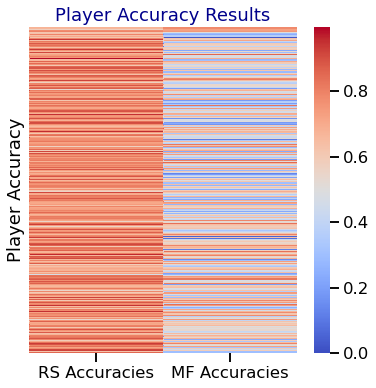

In [49]:
PlotComparisonResults(PlayerAccuracies_DataFrame, "Player Accuracy Results","Player Accuracy")

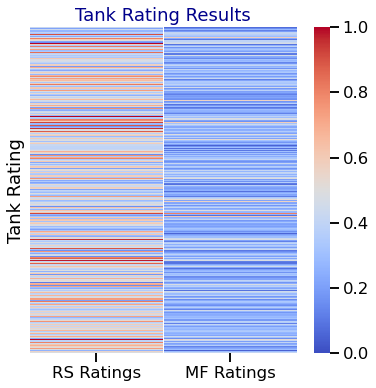

In [50]:
PlotComparisonResults(TankRatings_Dataframe, "Tank Rating Results","Tank Rating")

In [11]:
# Defint the MF tuning and MSE results ready for the graph
MF_Tuning_Results = [[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75], [157.4893, 145.6752, 137.8562, 131.7887, 127.9146, 123.6386, 120.9217, 118.2974, 115.8737, 114.5462, 112.4045, 111.4286, 110.2795, 109.1913, 109.4143]]
MF_MSE_Results = [[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250], [144.7681, 127.0255, 117.6033, 115.735, 113.1397, 111.0623, 110.2968, 108.9013, 108.6597, 108.9381, 108.1129, 108.8451, 107.6068, 107.421, 107.4424, 107.0446, 106.8153, 106.9861, 107.3011, 107.9847, 106.6292, 107.2434, 107.3427, 107.3044, 107.1228]]

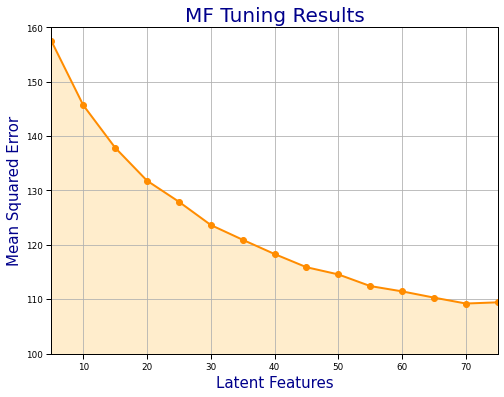

In [15]:
PlotTuningResults(MF_Tuning_Results,"MF Tuning Results",["Latent Features","Mean Squared Error"],[[5,75],[100,160]])

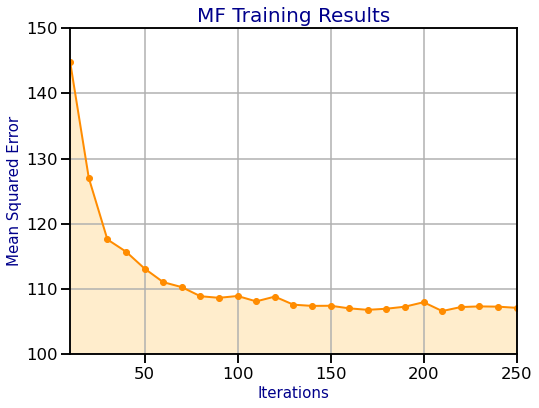

In [18]:
PlotTuningResults(MF_MSE_Results,"MF Training Results",["Iterations","Mean Squared Error"],[[10,250],[100,150]])